# Analysing HR Dataset with High Employee Turnover

## Import packages and config parameters

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Runtime config parameters for plots
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#e88fa3', '#f7d27a', '#86c599', '#1092aa'])
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.facecolor'] = '#e1e1e1'
plt.rcParams['figure.facecolor'] = '#e1e1e1'
plt.rcParams.update({'font.sans-serif':'Helvetica'})
%matplotlib inline

## Pre-process the dataset

In [84]:
df = pd.read_csv('/Users/martina/Desktop/dataset.csv')

# Renaming columns for better readability
df = df.rename(columns={
    'number_project': 'project_count',
    'average_montly_hours': 'avg_monthly_hours',
    'time_spend_company': 'years_at_company',
    'Work_accident': 'work_accident',
    'sales' : 'department',
    'left' : 'turnover'
})

# export processed dataset to excel file
df.to_excel('/Users/martina/Desktop/dataset.xlsx')

### Check if data is clean

In [85]:
df.isna().any()

satisfaction_level       False
last_evaluation          False
project_count            False
avg_monthly_hours        False
years_at_company         False
work_accident            False
turnover                 False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [86]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
project_count            False
avg_monthly_hours        False
years_at_company         False
work_accident            False
turnover                 False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

### Visualise the dataset

In [87]:
df.describe()

,satisfaction_level,last_evaluation,project_count,avg_monthly_hours,years_at_company,work_accident,turnover,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [88]:
# Mean of values in dataset grouped by turnover
summary = df.groupby('turnover')
round(summary.mean(numeric_only=True), 2)

,satisfaction_level,last_evaluation,project_count,avg_monthly_hours,years_at_company,work_accident,promotion_last_5years
turnover,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [89]:
# Standard deviation of values in dataset grouped by turnover
round(summary.std(numeric_only=True), 2)

,satisfaction_level,last_evaluation,project_count,avg_monthly_hours,years_at_company,work_accident,promotion_last_5years
turnover,,,,,,,
0,0.22,0.16,0.98,45.68,1.56,0.38,0.16
1,0.26,0.20,1.82,61.20,0.98,0.21,0.07


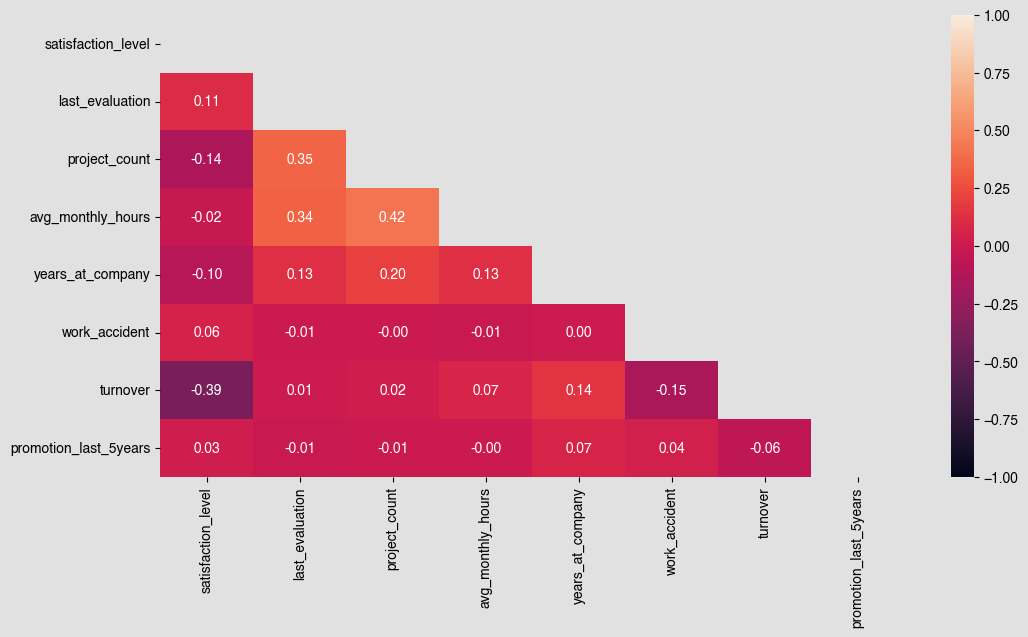

In [90]:
# Correlation map of variables in dataset
corr = df.corr(numeric_only=True)
fig = plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, fmt='.2f')

In [91]:
# Percentage of total turnover
round(df['turnover'].value_counts(1), 2)

0    0.76
1    0.24
Name: turnover, dtype: float64

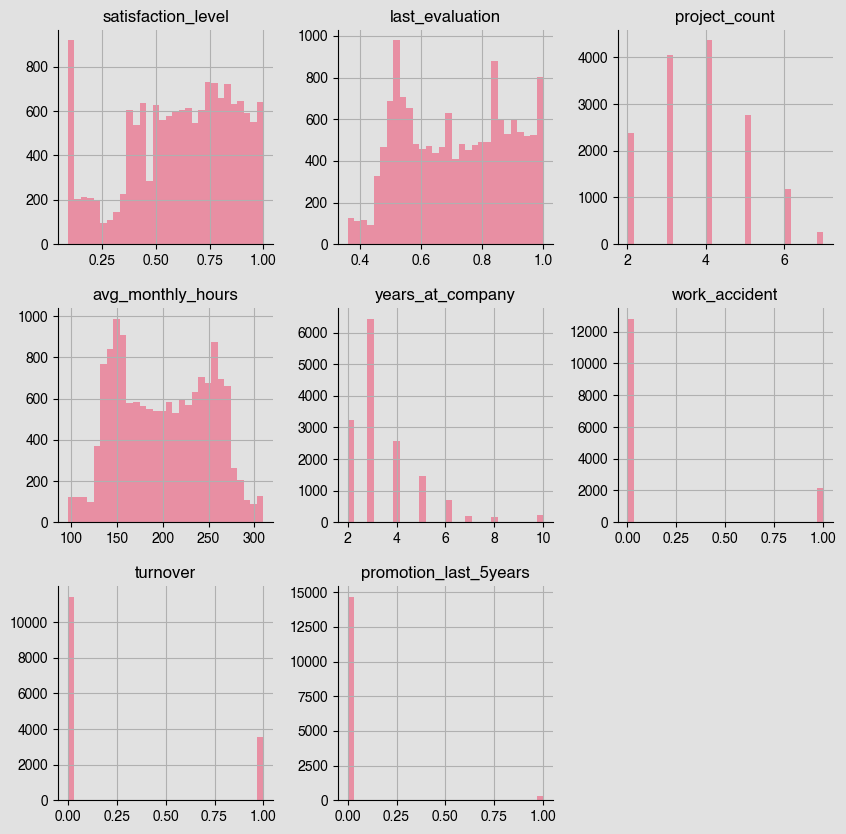

In [92]:
# Histogram view of variables in dataset
df.hist(bins=30, figsize=(10, 10));

## Data Analysis

### Company department VS turnover

In [93]:
turnover = df[df['turnover']==1]
turnover = pd.DataFrame(turnover['department'].value_counts()).reset_index()
retention = pd.DataFrame(df['department'].value_counts()).reset_index()
employee_status = pd.merge(turnover, retention, how='inner', on='index')
employee_status = employee_status.rename(columns={'department_x':'turnover', 'department_y':'total', 'index':'department'})
employee_status = employee_status.sort_values(by='total', ascending=False).reset_index(drop=True)
employee_status

,department,turnover,total
0,sales,1014,4140
1,technical,697,2720
2,support,555,2229
3,IT,273,1227
4,product_mng,198,902
5,marketing,203,858
6,RandD,121,787
7,accounting,204,767
8,hr,215,739
9,management,91,630


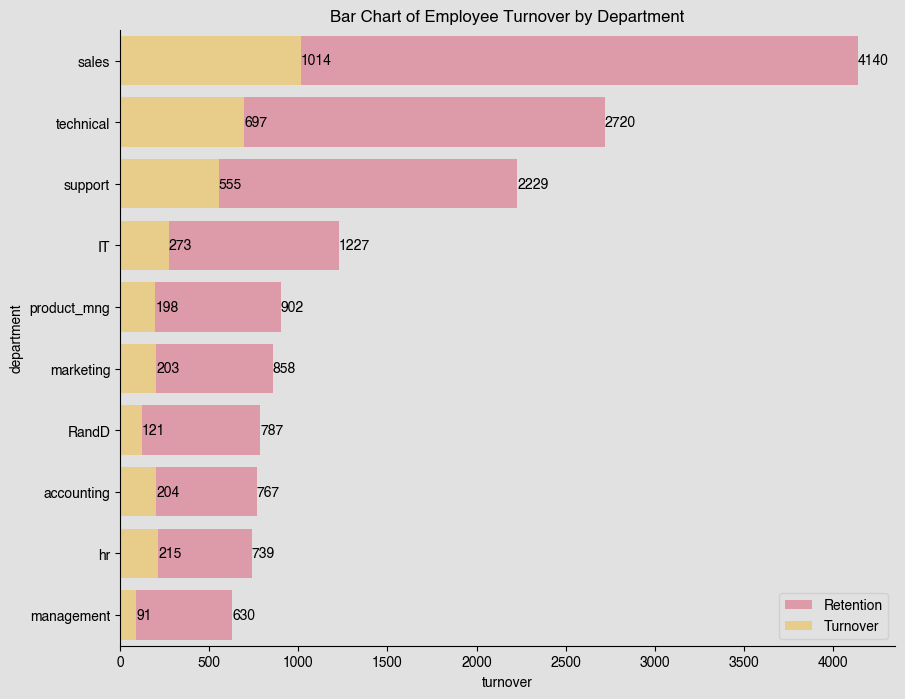

In [94]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x='total', y='department', data=employee_status, 
                 color='#e88fa3', label='Retention')
ax = sns.barplot(x='turnover', y='department', data=employee_status, 
                 color='#f7d27a', label='Turnover')
for i in ax.containers: ax.bar_label(i,)
ax.set_title('Bar Chart of Employee Turnover by Department')
ax.legend();

### Promotions in the last 5 years VS turnover

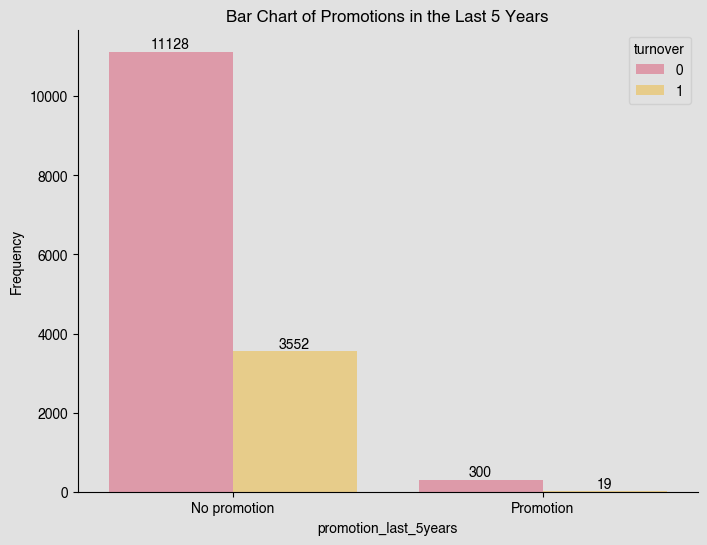

In [95]:
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(x='promotion_last_5years', y='promotion_last_5years', 
                 hue='turnover', data=df, estimator=lambda x: len(x))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_xticklabels(['No promotion', 'Promotion'])
ax.set_ylabel('Frequency');
ax.set_title('Bar Chart of Promotions in the Last 5 Years');

### Work accidents VS turnover

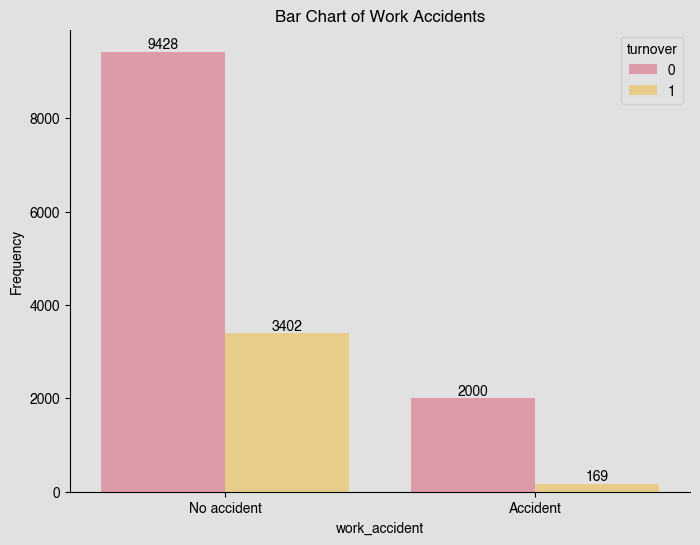

In [96]:
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(x='work_accident', y='work_accident', hue='turnover', data=df, 
                 estimator=lambda x: len(x))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_xticklabels(['No accident', 'Accident'])
ax.set_ylabel('Frequency')
ax.set_title('Bar Chart of Work Accidents');

### Salary bracket VS turnover

In [97]:
turnover = df[df['turnover']==1]
salary_turnover = pd.get_dummies(turnover['salary'], drop_first=False)
sal_turn = pd.DataFrame(data=salary_turnover.value_counts().values).T

retention = df[df['turnover']==0]
salary_retention = pd.get_dummies(retention['salary'], drop_first=False)
sal_ret = pd.DataFrame(data=salary_retention.value_counts().values).T

salary = pd.concat([sal_ret, sal_turn], axis=0)
salary.columns = ['salary_low', 'salary_medium', 'salary_high']
salary


,salary_low,salary_medium,salary_high
0,5144,5129,1155
0,2172,1317,82


<Figure size 800x600 with 0 Axes>

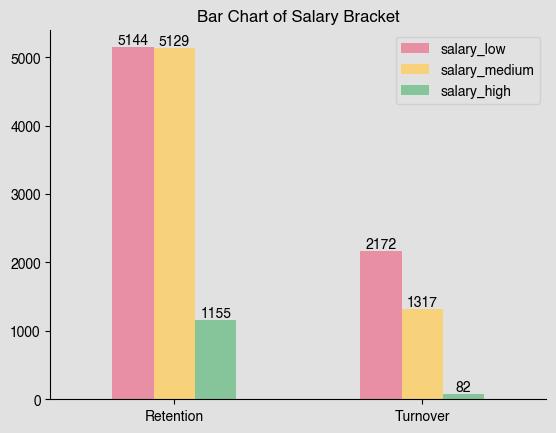

In [98]:
fig = plt.figure(figsize=(8,6))
ax = salary.plot(kind='bar')
ax.set_xticklabels(['Retention', 'Turnover'])
plt.xticks(rotation=0)
for i in ax.containers: ax.bar_label(i,)
ax.set_title('Bar Chart of Salary Bracket');

### Satisfaction level VS turnover

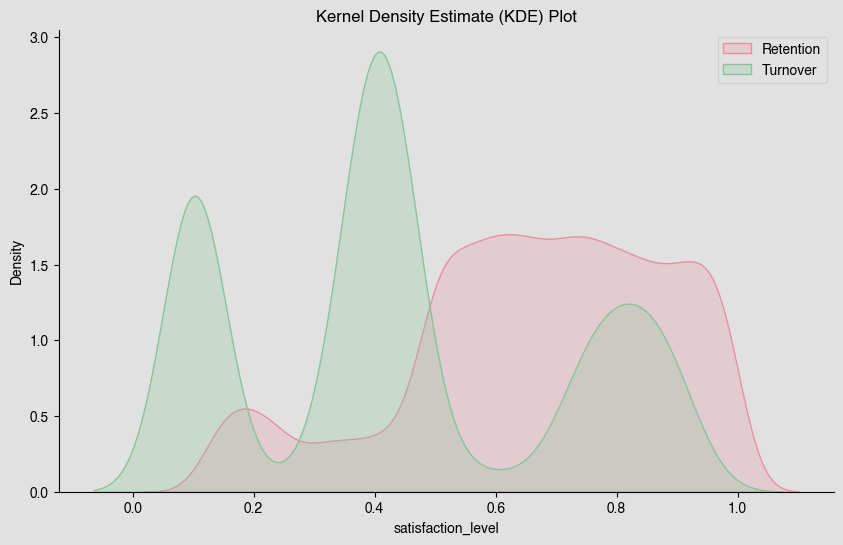

In [99]:
fig = plt.figure(figsize=(10, 6))
ax = sns.kdeplot(df.loc[(df['turnover'] == 0), 'satisfaction_level'], 
                 color='#e88fa3', fill=True, label='Retention')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'satisfaction_level'],
                 color='#86c599', fill=True, label='Turnover')
ax.set_title('Kernel Density Estimate (KDE) Plot')
ax.legend();

### Average monthly hours of work VS turnover

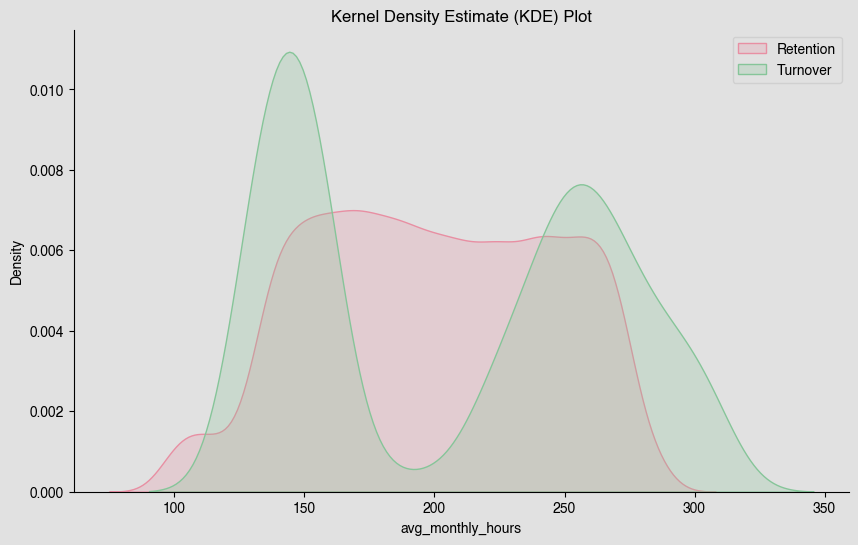

In [100]:
fig = plt.figure(figsize=(10, 6))
ax = sns.kdeplot(df.loc[(df['turnover'] == 0), 'avg_monthly_hours'], 
                 color='#e88fa3', fill=True, label='Retention')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'avg_monthly_hours'],
                 color='#86c599', fill=True, label='Turnover')
ax.set_title('Kernel Density Estimate (KDE) Plot')
ax.legend();

### Project count VS turnover

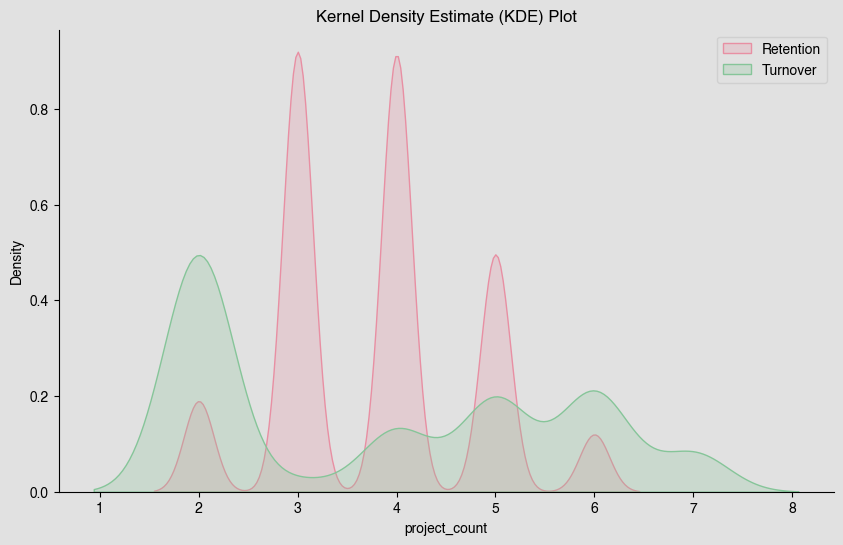

In [101]:
fig = plt.figure(figsize=(10, 6))
ax = sns.kdeplot(df.loc[(df['turnover'] == 0), 'project_count'], 
                 color='#e88fa3', fill=True, label='Retention')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'project_count'],
                 color='#86c599', fill=True, label='Turnover')
ax.set_title('Kernel Density Estimate (KDE) Plot')
ax.legend();

### Years at company VS turnover

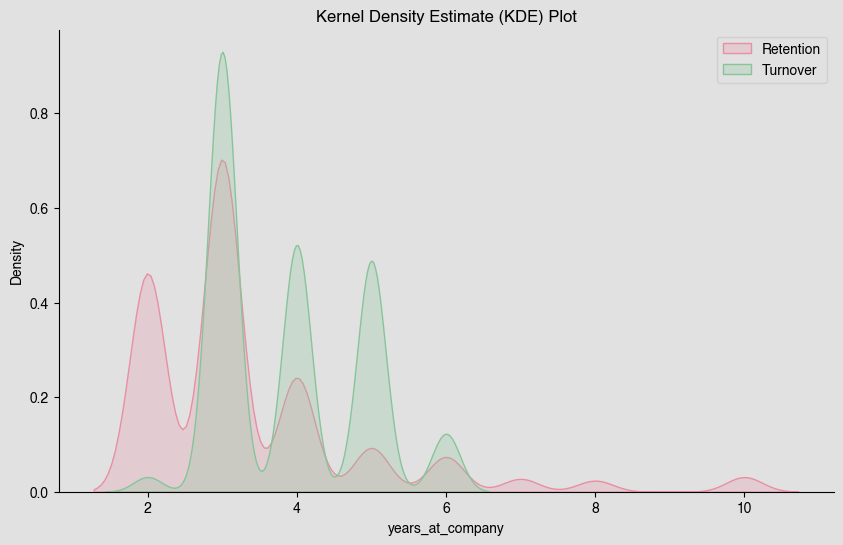

In [102]:
fig = plt.figure(figsize=(10, 6))
ax = sns.kdeplot(df.loc[(df['turnover'] == 0), 'years_at_company'], 
                 color='#e88fa3', fill=True, label='Retention')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'years_at_company'],
                 color='#86c599', fill=True, label='Turnover')
ax.set_title('Kernel Density Estimate (KDE) Plot')
ax.legend();

### Performance at last evaluation VS turnover

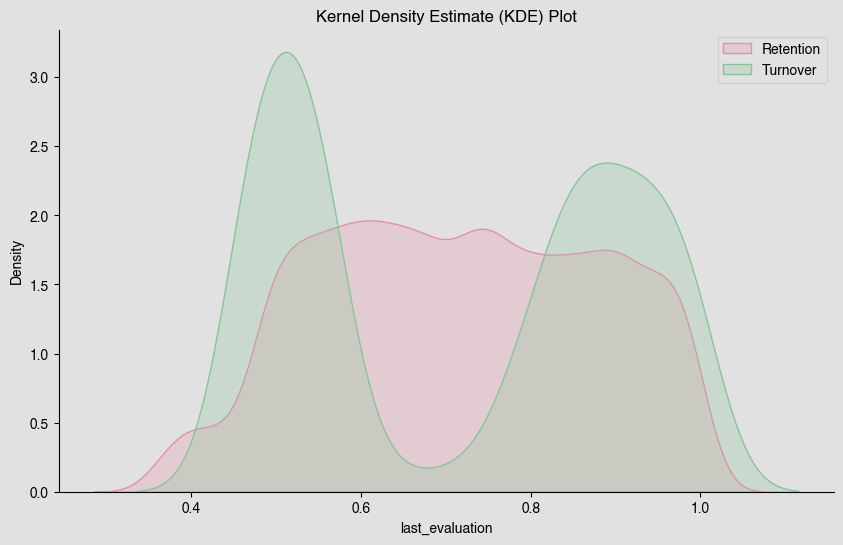

In [103]:
fig = plt.figure(figsize=(10, 6))
ax = sns.kdeplot(df.loc[(df['turnover'] == 0), 'last_evaluation'], 
                 color='#e88fa3', fill=True, label='Retention')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'last_evaluation'],
                 color='#86c599', fill=True, label='Turnover')
ax.set_title('Kernel Density Estimate (KDE) Plot')
ax.legend();

### Satisfaction level AND last evaluation VS turnover

Identifying the main groups of employee turnover

<Figure size 1000x1000 with 0 Axes>

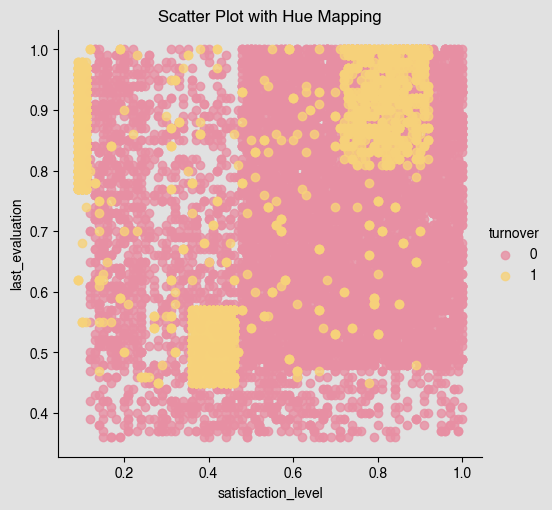

In [104]:
fig = plt.figure(figsize=(10, 10))
ax = sns.lmplot(x='satisfaction_level', y='last_evaluation', data=df, 
                fit_reg=False, hue='turnover')
plt.gca().set_title('Scatter Plot with Hue Mapping');

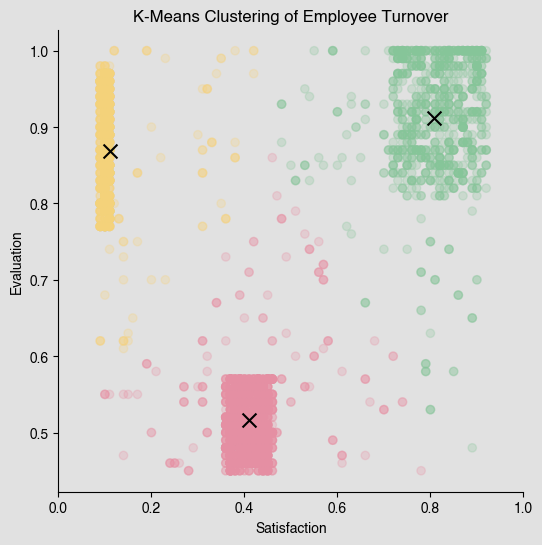

In [105]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df['turnover']==1][['satisfaction_level', 'last_evaluation']])
kmeans_colors = ['#86c599' if c == 0 else '#f7d27a' if c == 2 else '#e88fa3' 
                 for c in kmeans.labels_]

fig = plt.figure(figsize=(6,6))
ax = plt.scatter(x='satisfaction_level', y='last_evaluation', 
                 data=df[df['turnover']==1], alpha=0.25, color=kmeans_colors)
ax = plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],
            color='black', marker='x', s=100)
plt.xlim(0,1.0)
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')
plt.title('K-Means Clustering of Employee Turnover');

## Development of predictive model

The data is used to train a machine learning model (Random Forest Classifier) for it to be able to predict likelihood of employee turnover in the company.

In [106]:
# in this part of the analysis the categorical variables are turned into numerical
# because they all need to be taken into consideration to train the model

cat_var = ['department','salary','turnover','promotion_last_5years']
num_var = ['satisfaction_level','last_evaluation','project_count',
            'avg_monthly_hours','years_at_company', 'work_accident']
categorical_df = pd.get_dummies(df[cat_var], drop_first=False)
numerical_df = df[num_var]
df_md = pd.concat([categorical_df, numerical_df], axis=1)
df_md

,turnover,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,...,department_technical,salary_high,salary_low,salary_medium,satisfaction_level,last_evaluation,project_count,avg_monthly_hours,years_at_company,work_accident
0,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0.38,0.53,2,157,3,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0.80,0.86,5,262,6,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0.11,0.88,7,272,4,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0.72,0.87,5,223,5,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0.37,0.52,2,159,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0.40,0.57,2,151,3,0
14995,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0.37,0.48,2,160,3,0
14996,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0.37,0.53,2,143,3,0
14997,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0.11,0.96,6,280,4,0


In [107]:
# Creating a testing and training dataset with a 20% split
from sklearn.model_selection import train_test_split

x = df_md.iloc[:,1:]
y = df_md.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, 
                                                    random_state=1, stratify=y)
print(x_train.shape)
print(x_test.shape)

(11999, 20)
(3000, 20)


In [108]:
# Upsampling minority class to reduce data imbalance and prevent model bias
from sklearn.utils import resample

x_train_up, y_train_up = resample(x_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=x_train[y_train == 0].shape[0],
                                random_state=1)
x_train_up = np.concatenate((x_train[y_train == 0], x_train_up))
y_train_up = np.concatenate((y_train[y_train == 0], y_train_up))

In [109]:
# Train the predictive model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(x_train_up, y_train_up)

In [110]:
# Evaluate the model's cross-validation score
from sklearn.model_selection import cross_val_score

result = cross_val_score(rf, x_train_up, y_train_up, cv=5, scoring='f1')
result.mean()

0.9970476848819887

In [111]:
# Evaluate the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

roc_auc = roc_auc_score(y_test, rf.predict(x_test.values))
print ('AUC = %2.2f' % roc_auc)
print(classification_report(y_test, rf.predict(x_test.values)))

AUC = 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



### Calculation of feature importances

Indicates how much each feature contributes to the model's prediction.

In [112]:
feature_importances = pd.DataFrame(
    rf.feature_importances_, index = x_train.columns, columns=['importance']
    ).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,satisfaction_level,0.272101
1,years_at_company,0.248553
2,project_count,0.146716
3,avg_monthly_hours,0.143379
4,last_evaluation,0.128188
5,work_accident,0.014025
6,salary_low,0.008822
7,salary_high,0.007927
8,salary_medium,0.004634
9,department_technical,0.004123


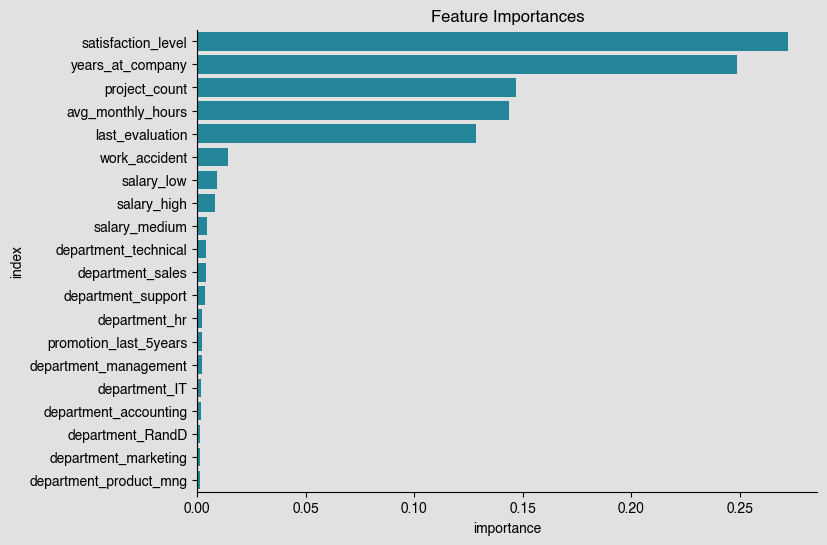

In [113]:
fig = plt.figure(figsize=(8, 6))
ax = sns.barplot(x='importance', y='index', data=feature_importances, color='#1092aa')
plt.gca().set_title('Feature Importances');

### Model predictions on test dataset

In [114]:
x_test['turnover_prob'] = rf.predict_proba(x_test.values)[:,1]
x_test

,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,...,salary_high,salary_low,salary_medium,satisfaction_level,last_evaluation,project_count,avg_monthly_hours,years_at_company,work_accident,turnover_prob
5621,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0.98,0.66,2,255,3,0,0.07
3629,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0.15,0.67,6,209,5,0,0.05
3118,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0.50,0.77,3,166,3,0,0.02
7428,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0.86,0.95,4,184,3,0,0.00
7145,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.53,0.51,6,272,5,0,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9097,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0.67,0.72,4,218,2,1,0.00
8942,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0.92,0.75,4,212,3,0,0.00
9257,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0.95,0.94,2,269,4,1,0.07
978,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0.39,0.56,2,156,3,0,1.00


<Figure size 1500x1000 with 0 Axes>

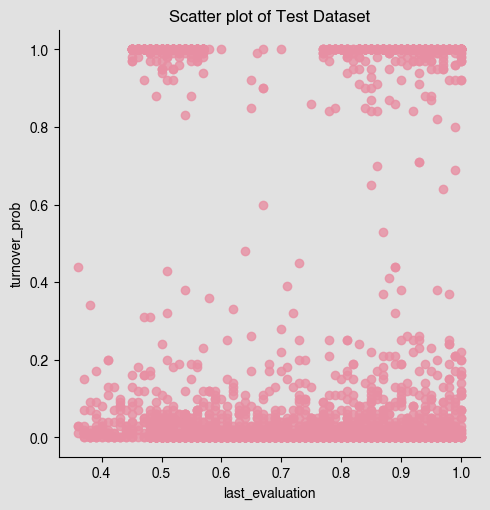

In [115]:
fig = plt.figure(figsize=(15, 10))
ax = sns.lmplot(x='last_evaluation', y='turnover_prob', data=x_test, fit_reg=False)
plt.gca().set_title('Scatter plot of Test Dataset');

### Model prediction on retention dataset

The predictive model is applied to the present employees and outputs the likelihood of their turnover

In [116]:
retention = df_md[df_md['turnover']==0].drop(['turnover'], axis=1)
retention['turnover_prob'] = rf.predict_proba(retention.values)[:,1]
retention

,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,...,salary_high,salary_low,salary_medium,satisfaction_level,last_evaluation,project_count,avg_monthly_hours,years_at_company,work_accident,turnover_prob
2000,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0.58,0.74,4,215,3,0,0.01
2001,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0.82,0.67,2,202,3,0,0.00
2002,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0.45,0.69,5,193,3,0,0.07
2003,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0.78,0.82,5,247,3,0,0.02
2004,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0.49,0.60,3,214,2,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14206,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0.90,0.55,3,259,10,1,0.01
14207,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0.74,0.95,5,266,10,0,0.04
14208,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0.85,0.54,3,185,10,0,0.01
14209,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0.33,0.65,3,172,10,0,0.01


<Figure size 1500x1000 with 0 Axes>

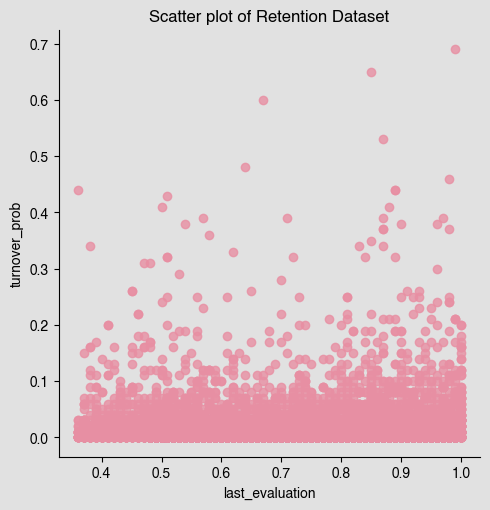

In [117]:
fig = plt.figure(figsize=(15, 10))
ax = sns.lmplot(x='last_evaluation', y='turnover_prob', data=retention, fit_reg=False)
plt.gca().set_title('Scatter plot of Retention Dataset');